# **WEATHER PREDICTION FOR DRONES**

The code processes weather data (precipitation) to determine whether it's a rainy day or not. It then uses this information to provide a flight status message for a drone. If it's a rainy day, the drone is deemed unable to fly due to predicted rainfall. Otherwise, it's considered conducive for drone flight. This code snippet demonstrates how machine learning predictions can be used to make real-world decisions, such as drone programming, based on weather conditions.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the historical weather data from the CSV file
weather = pd.read_csv("/content/weather new dataset.csv", index_col="DATE")

In [ ]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
01-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,57,NaN,42.0
02-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,54,70.0,46.0
03-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,52,63.0,NaN
04-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,49,61.0,40.0
05-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,50,62.0,37.0
...,...,...,...,...,...,...
17-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,96.0,80.0
18-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,85,94.0,81.0
19-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,NaN,82.0


In [ ]:
null_pct= weather.apply(pd.isnull).sum()/weather.shape[0]

In [ ]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.207921
TAVG       0.000000
TMAX       0.341584
TMIN       0.074257
dtype: float64

In [ ]:
valid_columns= weather.columns[null_pct<0.25]

In [ ]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMIN'], dtype='object')

In [ ]:
weather= weather[valid_columns].copy()

In [ ]:
weather.columns= weather.columns.str.lower()

In [ ]:
weather

,station,name,prcp,tavg,tmin
DATE,,,,,
01-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,57,42.0
02-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,54,46.0
03-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,52,NaN
04-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,49,40.0
05-01-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,50,37.0
...,...,...,...,...,...
17-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0
18-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0,85,81.0
19-07-2023,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0


In [ ]:
weather= weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tavg       0
tmin       0
dtype: int64

In [ ]:
weather.dtypes

station     object
name        object
prcp        object
tavg         int64
tmin       float64
dtype: object

In [ ]:
weather.index

Index(['01-01-2023', '02-01-2023', '03-01-2023', '04-01-2023', '05-01-2023',
       '06-01-2023', '07-01-2023', '08-01-2023', '09-01-2023', '10-01-2023',
       ...
       '12-07-2023', '13-07-2023', '14-07-2023', '15-07-2023', '16-07-2023',
       '17-07-2023', '18-07-2023', '19-07-2023', '20-07-2023', '21-07-2023'],
      dtype='object', name='DATE', length=202)

In [ ]:
weather.index=pd.to_datetime(weather.index)

<ipython-input-17-b67873d1c05a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather.index=pd.to_datetime(weather.index)


In [ ]:
weather.index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01',
               ...
               '2023-12-07', '2023-07-13', '2023-07-14', '2023-07-15',
               '2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21'],
              dtype='datetime64[ns]', name='DATE', length=202, freq=None)

In [ ]:
weather.index.year.value_counts().sort_index()

2023    202
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

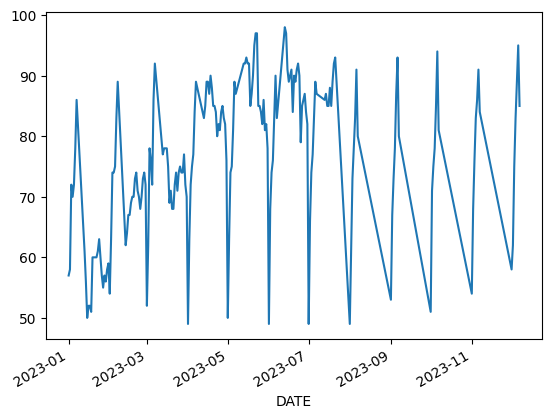

In [ ]:
weather["tavg"].plot()

In [ ]:
weather

,station,name,prcp,tavg,tmin
DATE,,,,,
2023-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,57,42.0
2023-02-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,54,46.0
2023-03-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,52,46.0
2023-04-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,49,40.0
2023-05-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,50,37.0
...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0,85,81.0
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0


In [ ]:
weather["target"]=weather.shift(-1)["tavg"]

In [ ]:
weather

,station,name,prcp,tavg,tmin,target
DATE,,,,,,
2023-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,57,42.0,54.0
2023-02-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,54,46.0,52.0
2023-03-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,52,46.0,49.0
2023-04-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,49,40.0,50.0
2023-05-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,50,37.0,49.0
...,...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0,85.0
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0,85,81.0,89.0
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0,92.0


In [ ]:
weather= weather.ffill()

In [ ]:
weather

,station,name,prcp,tavg,tmin,target
DATE,,,,,,
2023-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,57,42.0,54.0
2023-02-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,54,46.0,52.0
2023-03-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,52,46.0,49.0
2023-04-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,49,40.0,50.0
2023-05-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0,50,37.0,49.0
...,...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0,85.0
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0,85,81.0,89.0
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0,92.0


In [ ]:
from sklearn.linear_model import Ridge
rr= Ridge(alpha=.1)

In [ ]:
predictors= weather.columns[~weather.columns.isin(["target","name","station"])]

In [ ]:
predictors

Index(['prcp', 'tavg', 'tmin'], dtype='object')

In [ ]:
import pandas as pd


def backtest(weather, model, predictors, start=7 , step=15):
    all_predictions = []

    for i in range(start, weather.shape[0],step):
        train= weather.iloc[:i,:]
        test= weather.iloc[i:(i+step),:]

        model.fit(train[predictors],train["target"])

        preds= model.predict(test[predictors])

        preds= pd.Series(preds, index=test.index)
        combined= pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual","prediction"]

        combined["diff"] = (combined["prediction"]- combined["actual"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [ ]:
weather['prcp'] = weather['prcp'].str.replace(r'[^\d.]+', '', regex=True)
weather['prcp'] = weather['prcp'].astype(float)

In [ ]:
print(weather.dtypes)


station     object
name        object
prcp       float64
tavg         int64
tmin       float64
target     float64
dtype: object


In [ ]:
invalid_rows = weather[predictors].apply(pd.to_numeric, errors='coerce').isnull().any(axis=1)
print(weather[invalid_rows])

Empty DataFrame
Columns: [station, name, prcp, tavg, tmin, target]
Index: []


In [ ]:
weather = weather[~invalid_rows]

In [ ]:
predictions = backtest(weather, rr,predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
2023-08-01,53.0,49.307947,3.692053
2023-09-01,51.0,51.517438,0.517438
2023-10-01,54.0,49.670119,4.329881
2023-11-01,58.0,51.751565,6.248435
2023-12-01,61.0,53.748893,7.251107
...,...,...,...
2023-07-17,85.0,87.906068,2.906068
2023-07-18,89.0,84.255399,4.744601
2023-07-19,92.0,88.286886,3.713114


In [ ]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])


2.5889679095652776

In [ ]:
def pct_diff(old,new):
    return (new-old) / old

def compute_rolling(weather, horizon, col):
    label=f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3,14]

for horizon in rolling_horizons:
    for col in ["tavg"]:
        weather = compute_rolling(weather, horizon, col)

In [ ]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,,,
2023-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,57,42.0,54.0,NaN,NaN,NaN,NaN
2023-02-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,54,46.0,52.0,NaN,NaN,NaN,NaN
2023-03-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,52,46.0,49.0,54.333333,-0.042945,NaN,NaN
2023-04-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,49,40.0,50.0,51.666667,-0.051613,NaN,NaN
2023-05-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,50,37.0,49.0,50.333333,-0.006623,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0,85.0,86.000000,0.023256,84.785714,0.037911
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,85,81.0,89.0,86.000000,-0.011628,84.500000,0.005917
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0,92.0,87.333333,0.019084,84.642857,0.051477


In [ ]:
weather = weather.iloc[14:,:]


In [ ]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,,,
2023-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.25,50,40.0,52.0,55.666667,-0.101796,52.500000,-0.047619
2023-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,52,35.0,52.0,52.666667,-0.012658,52.357143,-0.006821
2023-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,52,36.0,51.0,51.333333,0.012987,52.357143,-0.006821
2023-01-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,51,37.0,60.0,51.666667,-0.012903,52.500000,-0.028571
2023-01-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,60,42.0,60.0,54.333333,0.104294,53.214286,0.127517
...,...,...,...,...,...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0,85.0,86.000000,0.023256,84.785714,0.037911
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,85,81.0,89.0,86.000000,-0.011628,84.500000,0.005917
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0,92.0,87.333333,0.019084,84.642857,0.051477


In [ ]:
weather = weather.fillna(0)

In [ ]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tavg"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,
2023-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.25,50,40.0,52.0,55.666667,-0.101796,52.500000,-0.047619,50.000000,50.0
2023-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,52,35.0,52.0,52.666667,-0.012658,52.357143,-0.006821,51.000000,52.0
2023-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,52,36.0,51.0,51.333333,0.012987,52.357143,-0.006821,51.333333,52.0
2023-01-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,51,37.0,60.0,51.666667,-0.012903,52.500000,-0.028571,51.250000,51.0
2023-01-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,60,42.0,60.0,54.333333,0.104294,53.214286,0.127517,53.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.31,88,80.0,85.0,86.000000,0.023256,84.785714,0.037911,82.454545,88.0
2023-07-18,IN022021900,"NEW DELHI SAFDARJUN, IN",0.00,85,81.0,89.0,86.000000,-0.011628,84.500000,0.005917,82.666667,85.0
2023-07-19,IN022021900,"NEW DELHI SAFDARJUN, IN",0.03,89,82.0,92.0,87.333333,0.019084,84.642857,0.051477,83.153846,89.0


In [ ]:
predictors= weather.columns[~weather.columns.isin(["target","name","station"])]

In [ ]:
predictors

Index(['prcp', 'tavg', 'tmin', 'rolling_3_tavg', 'rolling_3_tavg_pct',
       'rolling_14_tavg', 'rolling_14_tavg_pct', 'month_avg_tavg',
       'day_avg_tavg'],
      dtype='object')

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.6492986451761147

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2023-01-31,58.0,82.710570,24.710570
2023-01-30,59.0,80.736559,21.736559
2023-01-02,63.0,83.824645,20.824645
2023-01-29,58.0,77.654537,19.654537
2023-02-02,62.0,81.223101,19.223101
...,...,...,...
2023-03-22,74.0,74.069782,0.069782
2023-02-18,70.0,70.054511,0.054511
2023-06-20,89.0,89.046959,0.046959


<Axes: >

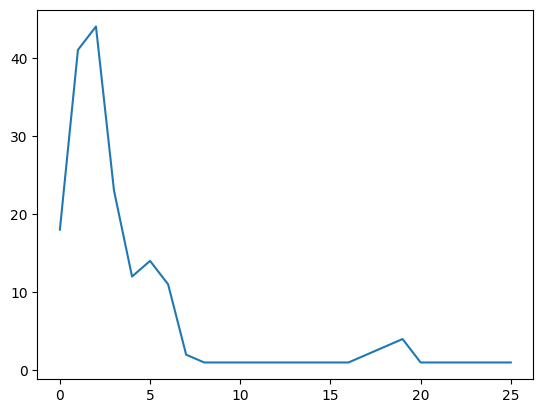

In [ ]:
predictions["diff"].round().value_counts().sort_index().plot()

In [ ]:
# Define the threshold for rainy that won't be feasible for the drone body to operate (in inches)
prcp_threshold = 0.1

# Function to determine if the day is rainy based on precipitation
def is_rainy_day(prcp):
    return prcp > prcp_threshold

# Add a new column "rainy" to the predictions DataFrame to indicate if it's a rainy day
predictions["rainy"] = weather.loc[predictions.index, "prcp"].apply(is_rainy_day)

# Function to check if the drone can fly based on weather prediction
def can_fly(row):
    if row["rainy"]:
        return "Drone can't fly. Rainfall is predicted."
    else:
        return "Drone can fly. Condusive weather predicted."

# Apply the "can_fly" function to each row and store the result in a new column "flight_status"
predictions["flight_status"] = predictions.apply(can_fly, axis=1)

# Display the predictions DataFrame with the flight status
print(predictions[["actual", "prediction", "diff", "rainy", "flight_status"]])

            actual  prediction       diff  rainy  \
DATE                                               
2023-01-22    61.0   64.784582   3.784582  False   
2023-01-23    63.0   67.276427   4.276427  False   
2023-01-24    60.0   72.741805  12.741805  False   
2023-01-25    57.0   73.685332  16.685332  False   
2023-01-26    55.0   74.198223  19.198223  False   
...            ...         ...        ...    ...   
2023-07-17    85.0   86.383401   1.383401   True   
2023-07-18    89.0   82.993592   6.006408  False   
2023-07-19    92.0   86.551999   5.448001  False   
2023-07-20    93.0   89.413925   3.586075  False   
2023-07-21    93.0   90.880617   2.119383  False   

                                          flight_status  
DATE                                                     
2023-01-22  Drone can fly. Condusive weather predicted.  
2023-01-23  Drone can fly. Condusive weather predicted.  
2023-01-24  Drone can fly. Condusive weather predicted.  
2023-01-25  Drone can fly. Condus